# Clase 5 - Reconocimiento de Patrones en Imagenes

En esta clase se exploran conceptos de reconocimiento de patrones en imágenes, utilizando momentos geométricos para caracterizar formas y análisis de características cromáticas para imágenes a color. Se emplean librerías como NumPy, Matplotlib y OpenCV para el procesamiento y visualización.


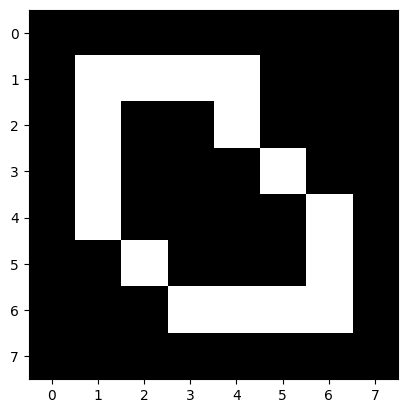

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bw=[[0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]]

bw = np.array(bw)

plt.figure()
plt.imshow(bw, cmap='gray')
plt.show()

[3.44827856 2.80902563 2.42706098 2.42706098 2.85317805 1.46308749
 2.52796855 1.54616461 2.57694102 2.57694102 2.21147575 2.98171511
 2.67219479 2.67219479 3.02334666 3.625     ]


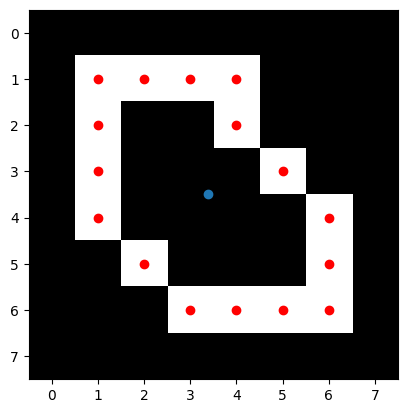

maximo: 1.4630874888399532
minimo: 3.625
promedio: 2.615102123873486


In [10]:
def mrs(imagen,r,s):
    R = np.argwhere(imagen==1)
    i = R[:,0]
    j = R[:,1]

    return np.sum((i**r) * (j**s)), i, j

m00, i, j = mrs(bw, 0,0)
m10, *_ = mrs(bw, 1,0)
m01, *_ = mrs(bw, 0,1)
centro = (m01/m00, m10/m00)

distancias = np.sqrt((centro[0]-i)**2 + (centro[1]-j)**2)

print(distancias)

plt.figure()
plt.imshow(bw, cmap='gray')
plt.scatter(centro[0], centro[1])
plt.scatter(j, i, c='red')
plt.show()

print("maximo:", np.min(distancias))
print("minimo:", np.max(distancias))
print("promedio:", np.mean(distancias))

---
## Análisis de características cromáticas en imágenes

El análisis de características cromáticas permite identificar y cuantificar la información de color en una imagen. Utilizando la librería OpenCV, se puede separar la imagen en sus canales de color (Rojo, Verde y Azul) y calcular el promedio de cada canal para obtener una representación numérica del color predominante.

Este tipo de análisis es útil en aplicaciones de visión por computadora, clasificación de objetos y segmentación, ya que el color es una característica fundamental para distinguir diferentes regiones o elementos en una imagen.

En el bloque de código siguiente se realiza:

- Lectura de una imagen a color.
- Conversión de la imagen al espacio RGB.
- Separación de los canales de color.
- Cálculo del color promedio en cada canal.
- Visualización de los canales y sus promedios.


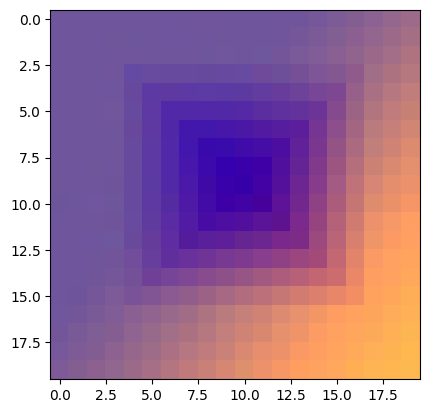

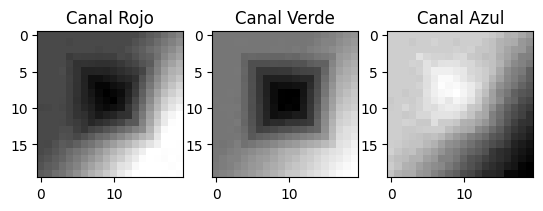

Promedio Rojo: 142.86, Promedio Verde: 89.8475, Promedio Azul: 140.205


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Lectura de la imagen desde el archivo.
img = cv2.imread('IMG/figura.jpg')

# Conversión de la imagen de BGR a RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separación de la imagen en sus tres canales de color: Rojo, Verde y Azul
r,g,b = cv2.split(img)

# Visualización de la imagen original en RGB
plt.figure()
plt.imshow(img)

def color_promedio(im):
    r, g, b = cv2.split(im)
    area = r.shape[0]*r.shape[1]  # Cálculo del área total de la imagen
    prom_r = np.sum(r)/area       # Promedio del canal rojo
    prom_g = np.sum(g)/area       # Promedio del canal verde
    prom_b = np.sum(b)/area       # Promedio del canal azul
    
    return prom_r, prom_g, prom_b

prom_r, prom_g, prom_b = color_promedio(img)

# Visualización de cada canal de color por separado en escala de grises
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='gray')
plt.title('Canal Rojo')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Canal Verde')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Canal Azul')
plt.show()

# Impresión de los valores promedio de cada canal de color
print(f"Promedio Rojo: {prom_r}, Promedio Verde: {prom_g}, Promedio Azul: {prom_b}")


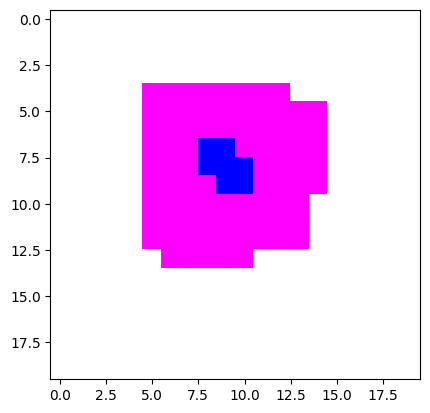

In [ ]:
# Aplicación de umbral (threshold) para segmentar la imagen.
# La función cv2.threshold convierte la imagen a una versión binaria:
# Los píxeles con valor mayor a 60 se asignan a 255 (blanco), el resto a 0 (negro).
rt, bw = cv2.threshold(img,60,255,cv2.THRESH_BINARY)

# Visualización de la imagen binarizada.
plt.figure()
plt.imshow(bw, cmap='gray')
plt.show()


### Imagen binarizada por umbralización
La imagen resultante muestra únicamente las regiones donde la intensidad supera el umbral establecido (en este caso, 60). Esto permite separar objetos del fondo o resaltar áreas específicas según el valor de umbral elegido.

Si la imagen binarizada se ve "extraña" o no como se espera, puede deberse a que el umbral no es adecuado para el rango de valores de la imagen, o a que la imagen original tiene más de un canal (RGB) y la función espera una imagen en escala de grises.

**Recomendación:** Para mejores resultados, se recomienda convertir la imagen a escala de grises antes de aplicar el umbral:
```python
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
rt, bw = cv2.threshold(img_gray, 60, 255, cv2.THRESH_BINARY)
```